# AutoML Regression Modelling with PyCaret

In [1]:
import pandas as pd
from pycaret.regression import *
from datetime import datetime, date
%matplotlib inline

#sen1 = pd.read_csv("sentencing_s.csv")
sen2 = pd.read_csv("./sentencing_post_eda.csv")

In [2]:
sen2.shape

(1227930, 47)

In [ ]:
sen2[["age", "totpts", "sp_cj_total_days", "totpts_cut_group"]].describe().apply(lambda s: s.apply('{0:.2f}'.format))

In [ ]:
sen2[["age", "totpts", "sp_cj_total_days", "totpts_cut_group"]].hist()

In [3]:
sen2 = sen2[['sp_cj_total_days', 'gender', 'age', 'race', 'circuit', 'totpts_cut_group', 'clfely']]

data = sen2.sample(frac=0.9, random_state=786)
data_unseen = sen2.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1105137, 7)
Unseen Data For Predictions: (122793, 7)


In [4]:
from pycaret.regression import *
X = setup(data = data, target = 'sp_cj_total_days', session_id=123, normalize = True, 
          transformation = True, #transform_target = True
          )

#X = setup(data = data, target = 'sp_cj_total_days', session_id=123, normalize = True, 
#          transformation = True, transform_target = True, 
#          combine_rare_levels = True, rare_level_threshold = 0.05,
#          remove_multicollinearity = True, multicollinearity_threshold = 0.95)

#, categorical_features = ['race', 'gender', 'county', 'judge', 'clfely']           
#['race', 'gender', 'county', 'judge', 'clfely', 'statut', 'offlvl', 'enhanc', 'haboff', 'habvio', 'vcc', 'prrpact', 'prioff', 'lsviol', 'faviol'])
          

,Description,Value
0,session_id,123
1,Target,sp_cj_total_days
2,Original Data,"(1105137, 7)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(773595, 52)"


In [5]:
best = compare_models(exclude = ['ransac', 'knn', 'et'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,253.2113,311939.2296,558.4829,0.5428,3.0685,2.8403,2.2390
xgboost,Extreme Gradient Boosting,252.3577,313228.6516,559.6328,0.5410,3.0421,2.8306,42.1340
gbr,Gradient Boosting Regressor,264.6182,329299.0261,573.8105,0.5174,3.1673,3.1292,59.2490
ridge,Ridge Regression,266.3206,335005.2701,578.7639,0.5091,3.1473,3.1231,0.2570
lar,Least Angle Regression,266.3187,335005.4045,578.7640,0.5091,3.1473,3.1230,0.2670
br,Bayesian Ridge,266.3203,335005.2441,578.7639,0.5091,3.1473,3.1231,5.1050
lr,Linear Regression,266.3251,335119.0114,578.8612,0.5089,3.1473,3.1228,2.1290
lasso,Lasso Regression,267.0981,339382.9565,582.5339,0.5027,3.1451,3.2494,11.1610
huber,Huber Regressor,244.6624,356477.0235,597.0227,0.4776,2.7359,2.1258,21.7510
par,Passive Aggressive Regressor,241.0536,356766.0973,597.2617,0.4772,2.4029,1.5898,2.1170


In [6]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,253.7728,310888.3147,557.5736,0.5438,3.0690,2.9236
1,252.3778,302393.1856,549.9029,0.5512,3.0622,2.7583
2,254.4274,322334.0560,567.7447,0.5364,3.0794,2.9235
3,252.4603,310654.2016,557.3636,0.5483,3.0673,2.8366
4,257.0202,324846.3002,569.9529,0.5339,3.0746,2.8310
5,251.8290,308949.9301,555.8326,0.5431,3.0665,2.9053
6,253.3701,312374.9677,558.9052,0.5313,3.0625,2.8030
7,252.0076,303805.3952,551.1854,0.5375,3.0730,2.8654
8,251.9550,309491.7787,556.3199,0.5499,3.0671,2.8682
9,252.8933,313654.1664,560.0484,0.5529,3.0636,2.6886


In [7]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,253.1874,311271.6354,557.9172,0.5433,3.0683,2.9201
1,251.1928,301415.3814,549.0131,0.5526,3.0654,2.7420
2,253.6843,321317.5053,566.8487,0.5379,3.0755,2.9140
3,251.9372,311606.4008,558.2172,0.5469,3.0672,2.8410
4,256.4175,325563.8801,570.5821,0.5328,3.0753,2.8295
5,250.6418,309037.8733,555.9117,0.5430,3.0668,2.9034
6,253.1617,314265.7781,560.5941,0.5285,3.0594,2.8031
7,250.8528,303390.8427,550.8093,0.5381,3.0665,2.8489
8,251.2742,310210.4907,556.9654,0.5489,3.0645,2.8641
9,252.0060,313151.5976,559.5995,0.5536,3.0601,2.6933


In [8]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


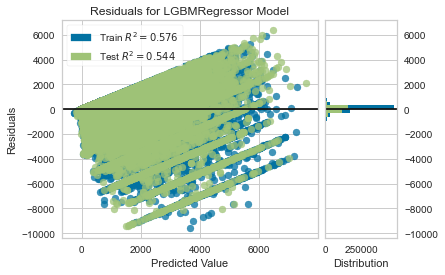

In [9]:
plot_model(tuned_lightgbm)


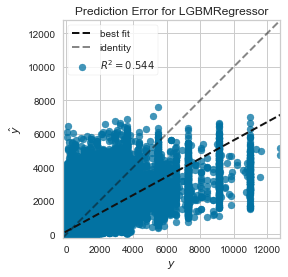

In [10]:
plot_model(tuned_lightgbm, plot = 'error')


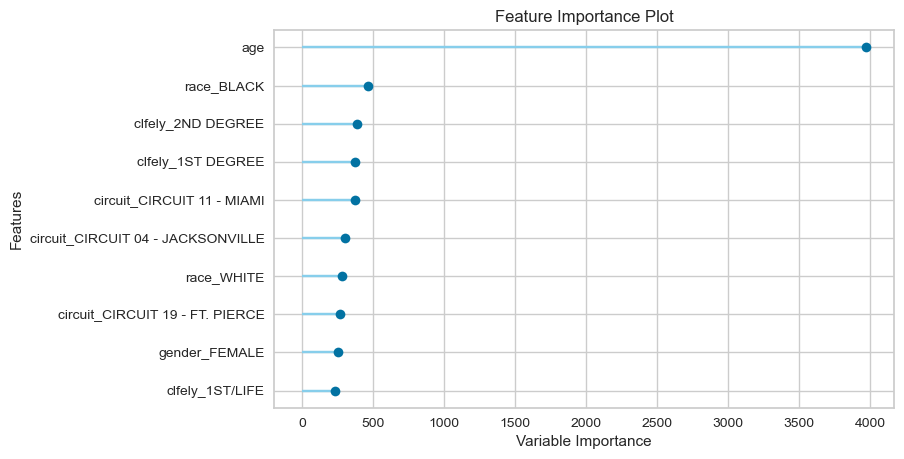

In [11]:
plot_model(tuned_lightgbm, plot='feature')


In [12]:
predict_model(tuned_lightgbm);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,252.3496,313264.5550,559.7004,0.5436,3.0641,2.8826


In [13]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [14]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [15]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,248.7339,294096.5952,542.3067,0.5715,3.0635,2.8791


In [16]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head(25)

,sp_cj_total_days,gender,age,race,circuit,totpts_cut_group,clfely,Label
0,3902,MALE,39,BLACK,CIRCUIT 11 - MIAMI,17,1ST DEGREE,2312.340193
1,3259,MALE,25,BLACK,CIRCUIT 17 - FT. LAUDERDALE,14,1ST/LIFE,3826.390273
2,5840,MALE,27,WHITE,CIRCUIT 11 - MIAMI,8,2ND DEGREE,1331.965303
3,660,MALE,31,BLACK,CIRCUIT 11 - MIAMI,4,2ND DEGREE,652.616726
4,1176,MALE,44,BLACK,CIRCUIT 04 - JACKSONVILLE,3,3RD DEGREE,791.942531
5,900,MALE,41,WHITE,CIRCUIT 06 - CLEARWATER,8,2ND DEGREE,2474.862670
6,2920,MALE,52,WHITE,CIRCUIT 11 - MIAMI,12,2ND DEGREE,1712.975194
7,1560,MALE,49,BLACK,CIRCUIT 20 - FT MYERS,7,1ST DEGREE,2034.031709
8,774,MALE,31,BLACK,CIRCUIT 11 - MIAMI,3,2ND DEGREE,579.078693
9,2938,MALE,45,WHITE,CIRCUIT 11 - MIAMI,13,1ST/LIFE,2392.944393


In [23]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.sp_cj_total_days, unseen_predictions.Label, 'R2')

0.545

In [18]:
check_metric(unseen_predictions[unseen_predictions.race=="BLACK"].sp_cj_total_days, unseen_predictions[unseen_predictions.race=="BLACK"].Label, 'R2')

0.4931

In [19]:
check_metric(unseen_predictions[unseen_predictions.race=="WHITE"].sp_cj_total_days, unseen_predictions[unseen_predictions.race=="WHITE"].Label, 'R2')

0.5242

In [18]:
save_model(final_lightgbm,'Final LightGBM Model Int 23Feb2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='sp_cj_total_days',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min

In [21]:
get_config('X_train').shape

(773595, 52)

In [29]:
unseen_predictions.head(50)

,sp_cj_total_days,gender,age,race,circuit,totpts_cut_group,clfely,Label
0,3902,MALE,39,BLACK,CIRCUIT 11 - MIAMI,17,1ST DEGREE,2555.363645
1,3259,MALE,25,BLACK,CIRCUIT 17 - FT. LAUDERDALE,14,1ST/LIFE,3945.286783
2,5840,MALE,27,WHITE,CIRCUIT 11 - MIAMI,8,2ND DEGREE,1301.035361
3,660,MALE,31,BLACK,CIRCUIT 11 - MIAMI,4,2ND DEGREE,670.433049
4,1176,MALE,44,BLACK,CIRCUIT 04 - JACKSONVILLE,3,3RD DEGREE,790.995362
5,900,MALE,41,WHITE,CIRCUIT 06 - CLEARWATER,8,2ND DEGREE,2556.103614
6,2920,MALE,52,WHITE,CIRCUIT 11 - MIAMI,12,2ND DEGREE,1774.059328
7,1560,MALE,49,BLACK,CIRCUIT 20 - FT MYERS,7,1ST DEGREE,2035.329667
8,774,MALE,31,BLACK,CIRCUIT 11 - MIAMI,3,2ND DEGREE,584.420510
9,2938,MALE,45,WHITE,CIRCUIT 11 - MIAMI,13,1ST/LIFE,2464.809742


In [6]:
get_config('X_train').dtypes

age                                     float32
gender_FEMALE                           float32
race_BLACK                              float32
race_OTHER                              float32
race_WHITE                              float32
circuit_0                               float32
circuit_97                              float32
circuit_CIRCUIT 01 - PENSACOLA          float32
circuit_CIRCUIT 02 - TALLAHASSEE        float32
circuit_CIRCUIT 03 - LAKE CITY          float32
circuit_CIRCUIT 04 - JACKSONVILLE       float32
circuit_CIRCUIT 05 - TAVARES            float32
circuit_CIRCUIT 06 - CLEARWATER         float32
circuit_CIRCUIT 07 - DAYTONA BEACH      float32
circuit_CIRCUIT 08 - GAINESVILLE        float32
circuit_CIRCUIT 09 - ORLANDO            float32
circuit_CIRCUIT 10 - BARTOW             float32
circuit_CIRCUIT 11 - MIAMI              float32
circuit_CIRCUIT 12 - SARASOTA           float32
circuit_CIRCUIT 13 - TAMPA              float32
circuit_CIRCUIT 14 - PANAMA CITY        

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

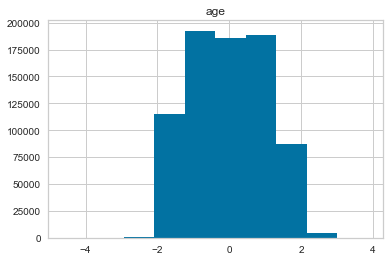

In [30]:
get_config('X_train')[['age']].hist()